IMPLEMENTING K-MEANS CLUSTERING, IMPLEMENTING IMAGE COMPRESSION

In [1]:
#k-means clustering can be used for image compression where similar pixels are grouped together to create compression

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
a = np.array([[1,2,3]])
b = np.array([[3,4,5],
             [6,7,8]])
c = a-b
c = c**2
d = np.sum(c, axis=1)
e = d**2
print(c)
print(d)
print(e)

[[ 4  4  4]
 [25 25 25]]
[12 75]
[ 144 5625]


In [5]:
f = np.where(e == 144)
print(f)
print(type(f))
print(f[0][0])

(array([0], dtype=int64),)
<class 'tuple'>
0


In [6]:
#this was just some testing

In [7]:
#now the main two funcs needed in k-means clustering is a func to find the cluster centroid closest to 
#any data point and the second func to reassign the cluster centroid to the mean of the cluster data pts 

In [8]:
#find the centroid index value closest to any data point and store it in a list, this is the step of forming
#the clusters
def find_closest_centroids(X, centroids):

    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray (m, n)): Input values      
        centroids (ndarray (K, n)): centroids matrix which stores the centroid vector in its rows
    
    Returns:
        idx (ndarray (m,)): closest centroids to xi
    """
    
    idx = []
    
    for i in range(X.shape[0]):
        diff = X[i]-centroids
        diff = diff**2
        dist = np.sum(diff, axis=1) #along cols
        minimum_ele = np.min(dist)
        idx.append(np.where(dist == minimum_ele)[0][0])
        
    idx =  np.array(idx)
    
    return idx

In [9]:
#func to reassign centroids of a cluster to the mean of all the data pts of that cluster
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray (m, n)): Data points
        idx (ndarray (m,)): Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int): number of centroids
    
    Returns:
        centroids (ndarray (K, n)): New centroids computed
    """
    
    centroids = []
    
    for i in range(K):
        cluster_pts = X[np.where(idx == i)]
        cluster_avg = np.sum(cluster_pts, axis=0)/(cluster_pts.shape[0])
        centroids.append(cluster_avg)
    centroids = np.array(centroids)
            
    return centroids

In [30]:
#the main func where k-means is run
def run_kmeans(X, init_centroid, max_iter):
    centroid = init_centroid
    K = init_centroid.shape[0]
    for i in range(max_iter):
        idx = find_closest_centroids(X, centroid)
        centroid = compute_centroids(X, idx, K)
        print(f"iteration {i+1} done")

    return idx, centroid

In [31]:
#loading the data to be used 
X = np.load('C:\\Users\\Lenovo\\OneDrive\\Desktop\\coursera_ml\\data5.npy')
print(X)

[[ 1.84207953  4.6075716 ]
 [ 5.65858312  4.79996405]
 [ 6.35257892  3.2908545 ]
 [ 2.90401653  4.61220411]
 [ 3.23197916  4.93989405]
 [ 1.24792268  4.93267846]
 [ 1.97619886  4.43489674]
 [ 2.23454135  5.05547168]
 [ 2.98340757  4.84046406]
 [ 2.97970391  4.80671081]
 [ 2.11496411  5.37373587]
 [ 2.12169543  5.20854212]
 [ 1.5143529   4.77003303]
 [ 2.16979227  5.27435354]
 [ 0.41852373  4.88312522]
 [ 2.47053695  4.80418944]
 [ 4.06069132  4.99503862]
 [ 3.00708934  4.67897758]
 [ 0.66632346  4.87187949]
 [ 3.1621865   4.83658301]
 [ 0.51155258  4.91052923]
 [ 3.1342801   4.96178114]
 [ 2.04974595  5.6241395 ]
 [ 0.66582785  5.24399257]
 [ 1.01732013  4.84473647]
 [ 2.17893568  5.29758701]
 [ 2.85962615  5.26041997]
 [ 1.30882588  5.30158701]
 [ 0.99253246  5.01567424]
 [ 1.40372638  4.57527684]
 [ 2.66046572  5.19623848]
 [ 2.79995882  5.11526323]
 [ 2.06995345  4.6846713 ]
 [ 3.29765181  5.59205535]
 [ 1.8929766   4.89043209]
 [ 2.55983064  5.26397756]
 [ 1.15354031  4.67866717]
 

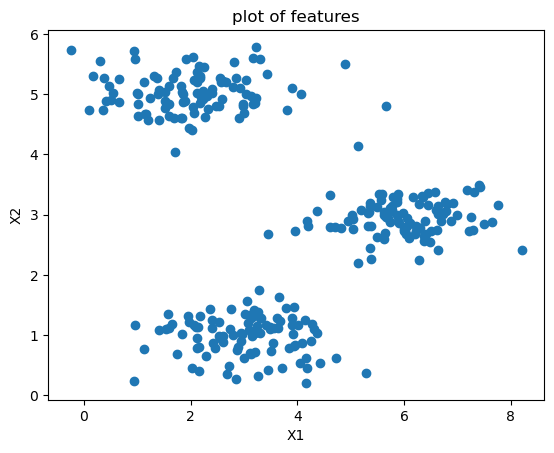

In [32]:
#plotting it 
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('plot of features')
plt.show()

In [33]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])  #here, we are also setting the K to be 3 along with setting
#random values to these centroids
idx, centroids_final = run_kmeans(X, initial_centroids, 10)

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done


In [34]:
print(idx)

[0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0]


In [35]:
#data pts corresponding to first cluster
X1 = X[np.where(idx==0)[0]]

#data pts corresponding to second cluster
X2 = X[np.where(idx==1)[0]]

#data pts corresponding to third cluster
X3 = X[np.where(idx==2)[0]]

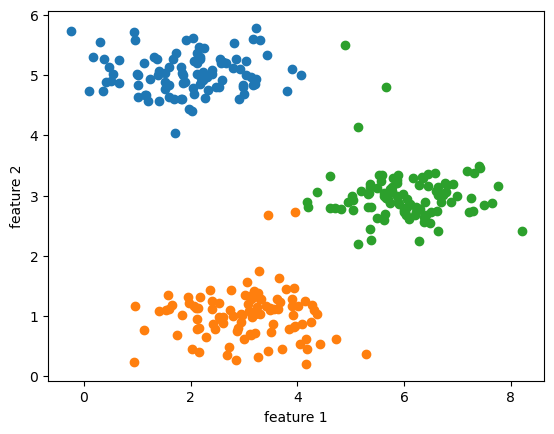

In [36]:
#looking at the clusters
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[: , 1])
plt.scatter(X3[:, 0], X3[:, 1])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [17]:
#the clustered data pts

In [18]:
#a good practice is to initially assign some data points themselves as the centroids, so a func for this
def init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray (m,n)): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray (K,n)): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [19]:
#looking at image compression which uses k-means clustering to cluster similar pixels
org_img = plt.imread('C:\\Users\\Lenovo\\OneDrive\\Desktop\\coursera_ml\\bird_small.png')

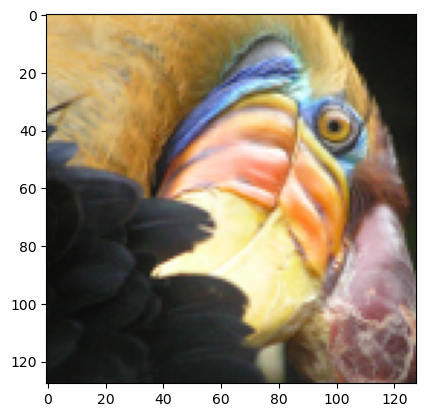

In [20]:
plt.imshow(org_img)

In [21]:
print(org_img.shape)

(128, 128, 3)


In [23]:
#this is in a 3rd order tensor, to run it with our functions it needs to be converted into a (m,3) np array where
#m is the total number of pixels in this image given by org_img.shape[0]*org_img.shape[1], done as follows
X_img = np.reshape(org_img, (org_img.shape[0]*org_img.shape[1], 3))
print(X_img)  #the r,g,b values are scaled to be between 0 and 1, it is already the case in case of png images but
#for jpg images it needs to be scaled manually by dividing those values by 255

[[0.85882354 0.7058824  0.40392157]
 [0.9019608  0.7254902  0.45490196]
 [0.8862745  0.7294118  0.43137255]
 ...
 [0.25490198 0.16862746 0.15294118]
 [0.22745098 0.14509805 0.14901961]
 [0.20392157 0.15294118 0.13333334]]


In [24]:
#initially this photo had 1000 diff colors, now with compression we want to reduce it to 16, so instead of representing
#each pixel as holding one of 1000 cols now each pixel holds only one of 16 cols(by hold it means that each pixel
#holds the index of that color) so 16 cols indicate 16 indices or vals from 0-15 hence 4 bits are needed as compared 
#to many more for 1000 indices

In [37]:
k = 16
max_iter = 10
init_centoids = init_centroids(X_img, k)
idx, centroids_final = run_kmeans(X_img, init_centoids, max_iter)

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done


In [39]:
print(idx.shape)
print(idx[:5])

(16384,)
[12 12 12 12 12]


In [41]:
print(centroids_final)  #gives the rgb values of the 16 cols selected for the compressed image

[[0.07411972 0.08026029 0.06977899]
 [0.46168453 0.4381498  0.46459904]
 [0.47448355 0.35199943 0.22370459]
 [0.82179505 0.5748964  0.2678192 ]
 [0.5350073  0.66473705 0.8304602 ]
 [0.82010305 0.7406668  0.7286333 ]
 [0.05780588 0.06340926 0.05358049]
 [0.19659542 0.18887587 0.18087053]
 [0.6701122  0.5903037  0.51675695]
 [0.97572935 0.9370093  0.79588836]
 [0.09402859 0.10145076 0.0908803 ]
 [0.9511944  0.8272738  0.58411044]
 [0.8500648  0.6953379  0.43569657]
 [0.1274679  0.13620064 0.12709826]
 [0.30349386 0.27148077 0.2671482 ]
 [0.6393972  0.48000315 0.2620921 ]]


In [42]:
#now we let all the pixels in a cluster have the same color as its centroid

In [49]:
X_recovered = centroids_final[idx, :]   #letting all the pixels of a cluster take the rgb value of the its centroid
#idx has 128*128 numbers only ranging from 0-15 which represent the indices of the colors in centroid_final
print(X_recovered)
print(X_recovered.shape)

[[0.8500648  0.6953379  0.43569657]
 [0.8500648  0.6953379  0.43569657]
 [0.8500648  0.6953379  0.43569657]
 ...
 [0.19659542 0.18887587 0.18087053]
 [0.19659542 0.18887587 0.18087053]
 [0.19659542 0.18887587 0.18087053]]
(16384, 3)


In [51]:
X_recovered = np.reshape(X_recovered, org_img.shape)  #reshaping to initial form so as to show the compressed img

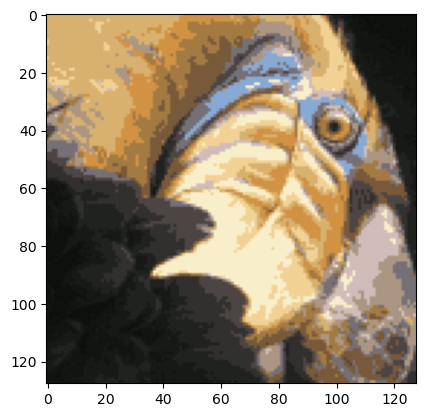

In [52]:
plt.imshow(X_recovered)

In [53]:
#the compressed image shown, with only 16 colors

In [54]:
#now initially each pixel needed 24 bits(3*8 bits, 3 because of 3 channels of r,g,b), hence total bits needed is
#128*128*24 = 393216 bits

#now with only 16 colors, we represent the index of the color in each pixel which takes up 4 bits so 128*128*4 bits 
#plus some overhead storage to actually store the colors in a dictionary which takes up 16*8*3 bits so
#128*128*4 + 16*3*8 = 65920 bits which is far lesser